text_width 6.75
column_width 3.25
vpsde_dds_anchor_epoch_10_guided_gstrength_0.25_.pt
	 BEST PSNR:  30.221809903159738  with param=  0.35
	 BEST SSIM:  0.950225463442969  with param=  0.35
vpsde_dds_anchor_epoch_10_guided_gstrength_0.5_.pt
	 BEST PSNR:  29.31871243491769  with param=  0.25
	 BEST SSIM:  0.9404546256468723  with param=  0.25
vpsde_dds_anchor_epoch_10_guided_gstrength_1.0_.pt
	 BEST PSNR:  26.662674575997517  with param=  0.15
	 BEST SSIM:  0.8989361158364453  with param=  0.15
vpsde_dds_anchor_epoch_4_.pt
	 BEST PSNR:  22.457751724706032  with param=  0.25
	 BEST SSIM:  0.7892689793272456  with param=  0.2


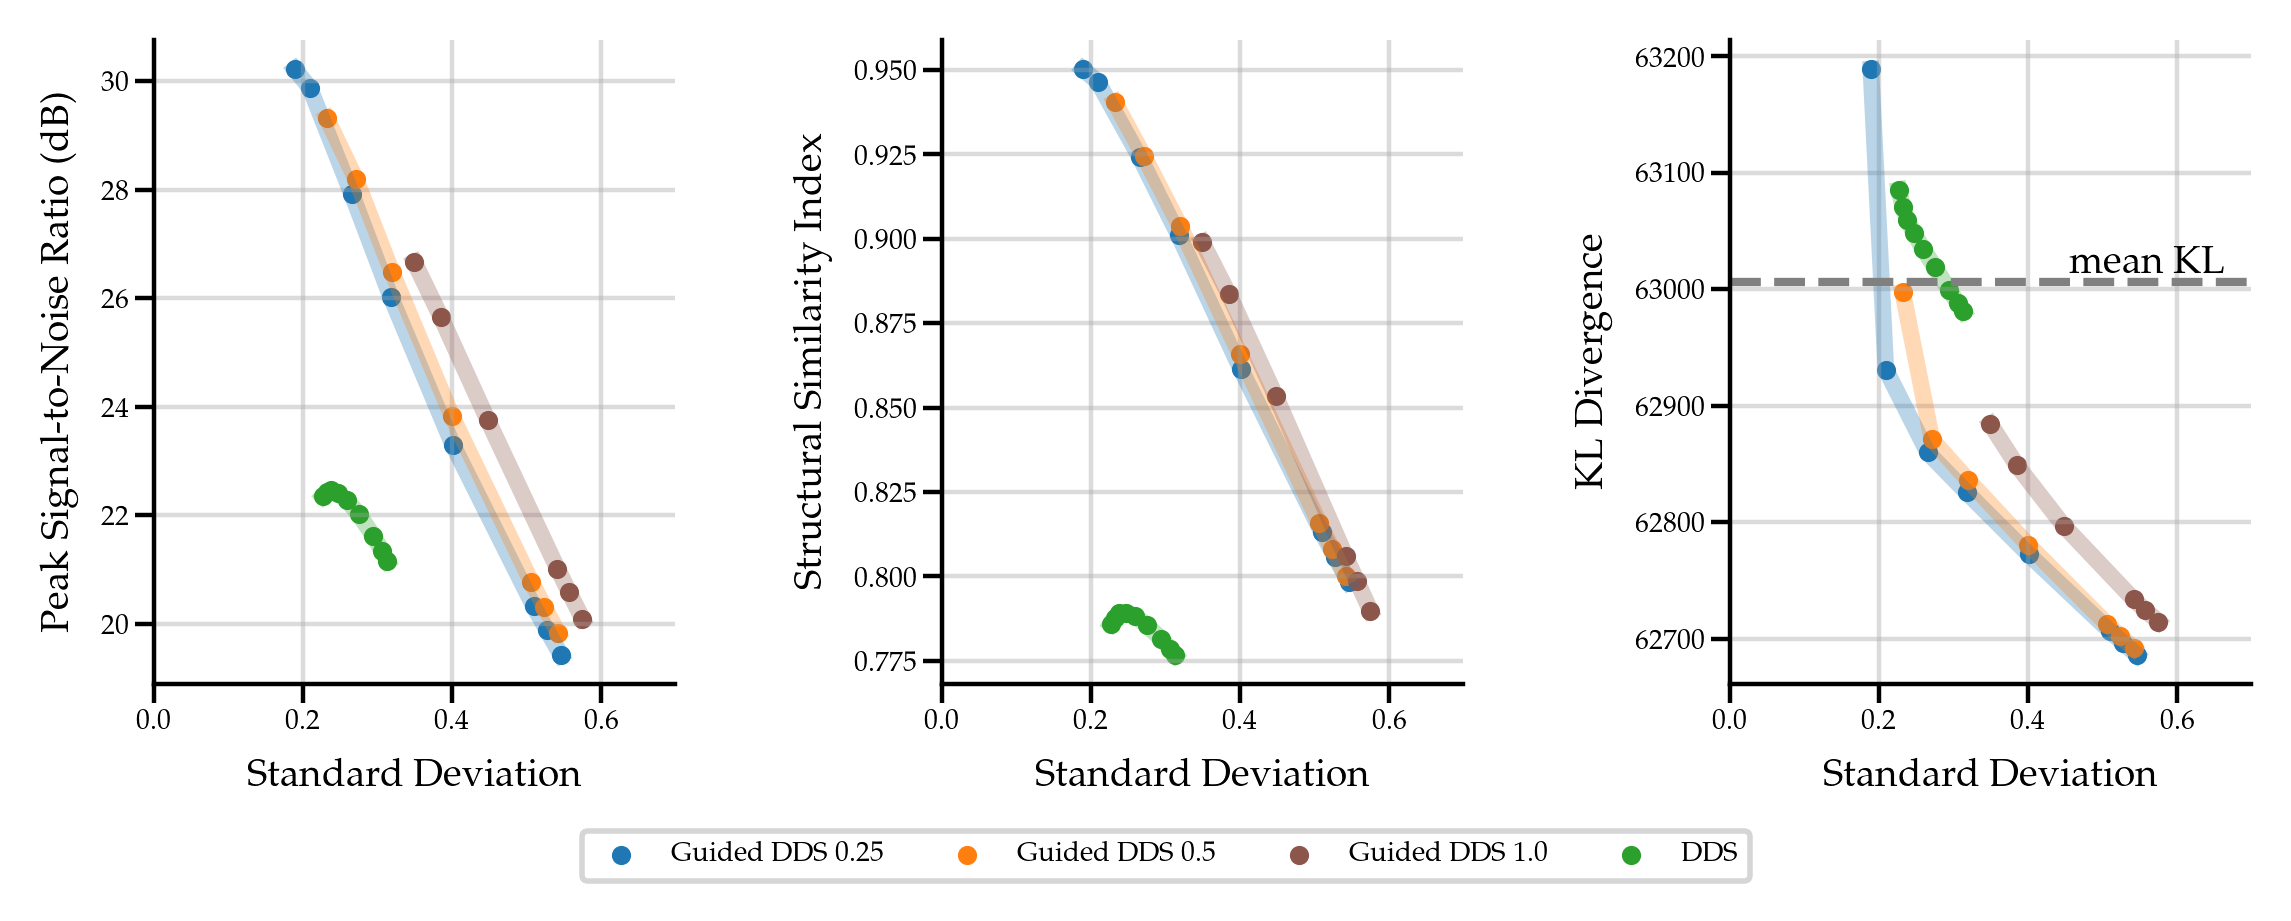

In [7]:
import matplotlib, os
import numpy as np
import matplotlib.pyplot as plt
from result_util import get_sweep_mean_results
import matplotlib.patches as mpatches

text_width = (72.27 ** -1) * 487.8225 # in  --> Confirmed with template explanation
print('text_width', text_width)
column_width = (72.27 ** -1) * 234.8775
print('column_width', column_width)

fs_m1 = 5  # for figure ticks
fs = 7  # for regular figure text
fs_p1 = 8  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)

MEAN_KLDIV = 63006.00431640625
noise_level = 2.5

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(text_width, text_width/3), dpi = 400)

f_to_name = {
    "vpsde_dds_anchor_epoch_10_guided_gstrength_0.25_.pt" : r"Guided DDS 0.25",
    "vpsde_dds_anchor_epoch_10_guided_gstrength_0.5_.pt" : r"Guided DDS 0.5",
    "vpsde_dds_anchor_epoch_10_guided_gstrength_1.0_.pt" : r"Guided DDS 1.0",
    "vpsde_dds_anchor_epoch_4_.pt" : r"DDS"
}

f_to_color = {
    "vpsde_dds_anchor_epoch_4_.pt": '#2ca02c',
    "vpsde_dds_anchor_epoch_10_guided_gstrength_0.25_.pt" : '#1f77b4',
    "vpsde_dds_anchor_epoch_10_guided_gstrength_0.5_.pt" : '#ff7f0e',
    "vpsde_dds_anchor_epoch_10_guided_gstrength_1.0_.pt" : '#8c564b'
}


c_idx = 0
for f in os.listdir(f"noise_level={str(noise_level)}/non_tumour"):
    if f in list(f_to_color.keys()):
        print(f)
        res = get_sweep_mean_results(os.path.join(f"noise_level={str(noise_level)}/non_tumour", f))
        # filter to high kldiv
        
        best_psnr = np.argmax(res["psnrs"])
        print("\t BEST PSNR: ", res["psnrs"][best_psnr].item(), " with param= ", res["datafit_strengths"][best_psnr])
        best_ssim = np.argmax(res["ssims"])    
        print("\t BEST SSIM: ", res["ssims"][best_ssim].item(), " with param= ", res["datafit_strengths"][best_ssim])

        to_plot = np.argwhere(np.array(res["kldivs"]) < 64000.)
        res["stds"] = np.array(res["stds"])[to_plot]
        res["psnrs"] = np.array(res["psnrs"])[to_plot]
        res["ssims"] = np.array(res["ssims"])[to_plot]
        res["kldivs"] = np.array(res["kldivs"])[to_plot]
        res["crcs"] = np.array(res["crcs"])[to_plot]
        res["datafit_strengths"] = np.array(res["datafit_strengths"])[to_plot]
        
        
        
        if f == "rdp_.pt": 
            res["stds"] = res["stds"][2:]
            res["psnrs"] = res["psnrs"][2:]
            res["ssims"] = res["ssims"][2:]
            res["kldivs"] = res["kldivs"][2:]
            res["crcs"] = res["crcs"][2:]
            res["datafit_strengths"] = res["datafit_strengths"][2:]

        if f == "vpsde_naive_.pt":
            res["stds"] = res["stds"][5:-1]
            res["psnrs"] = res["psnrs"][5:-1]
            res["ssims"] = res["ssims"][5:-1]
            res["kldivs"] = res["kldivs"][5:-1]
            res["crcs"] = res["crcs"][5:-1]
            res["datafit_strengths"] = res["datafit_strengths"][5:-1]

        if f == "vpsde_dps_.pt":
            res["stds"] = res["stds"][3:-1]
            res["psnrs"] = res["psnrs"][3:-1]
            res["ssims"] = res["ssims"][3:-1]
            res["kldivs"] = res["kldivs"][3:-1]
            res["crcs"] = res["crcs"][3:-1]
            res["datafit_strengths"] = res["datafit_strengths"][3:-1]            


        if f == "vpsde_OSEMNLL_naive_.pt":
            res["stds"] = res["stds"][2:-1]
            res["psnrs"] = res["psnrs"][2:-1]
            res["ssims"] = res["ssims"][2:-1]
            res["kldivs"] = res["kldivs"][2:-1]
            res["crcs"] = res["crcs"][2:-1]
            res["datafit_strengths"] = res["datafit_strengths"][2:-1]


        ax1.plot(res["stds"], res["psnrs"], ls="-", alpha=0.3, c=f_to_color[f], lw=3)
        ax1.scatter(res["stds"], res["psnrs"], label=f_to_name[f], c=f_to_color[f],s=6)

        ax2.plot(res["stds"], res["ssims"], ls="-", alpha=0.3, c=f_to_color[f], lw=3)
        ax2.scatter(res["stds"], res["ssims"], label=f_to_name[f], c=f_to_color[f],s=6)

        ax3.plot(res["stds"], res["kldivs"], ls="-", alpha=0.3, c=f_to_color[f], lw=3)
        ax3.scatter(res["stds"], res["kldivs"], label=f_to_name[f], c=f_to_color[f],s=6)
        
ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top']].set_visible(False)
ax1.tick_params(axis='both', which='major', pad = 1)
ax2.tick_params(axis='both', which='major', pad = 1)
ax3.tick_params(axis='both', which='major', pad = 1)
ax1.set_ylabel(r"Peak Signal-to-Noise Ratio (dB)")
ax1.set_xlabel(r"Standard Deviation")
ax2.set_ylabel(r"Structural Similarity Index")
ax2.set_xlabel(r"Standard Deviation")
ax3.set_ylabel(r"KL Divergence")
ax3.set_xlabel(r"Standard Deviation")


ax3.hlines(MEAN_KLDIV, 0, 0.7, color="gray", ls="--")
ax1.set_xlim(0, 0.7)
ax2.set_xlim(0, 0.7)
ax3.set_xlim(0, 0.7)

ax1.grid(0.3, alpha=0.45, zorder=0)
ax2.grid(0.3, alpha=0.45, zorder=0)
ax3.grid(0.3, alpha=0.45, zorder=0)

lines_labels =  [ax1.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncols=4, loc="lower center", bbox_to_anchor=(0.5, -0.07))

plt.subplots_adjust(left=0.125,
        bottom=0.164,
        right=0.902,
        top=0.88,
        wspace=0.51,
        hspace=0.212)

#(\Bar{\mathsbf{y}}|\mathsbf{y})
ax3.text(0.8, 0.65, 'mean KL', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
plt.savefig("no_tumour_25_guided.pdf", dpi=400, bbox_inches = 'tight')